This jupyter notebook plots the Heat of cement vs. mix of ingredients (hald.mat) data and a least squares fit using the pseudo inverse method.

then creates a least squares fit model using the pseudo inverse method. 

Linear System ofr equations: 

$A x = b$

Pseudo Inverse of A is as follows: 

$A = \hat{U} \hat{\Sigma} V^{T} \rarr A^{+} = V \Sigma^{-1} U^{T}$ \

Least-Square Fit: 

$\tilde{x} = A^{+} b$

Size of Matrix A: (13, 4)
Size of Matrix b: (13,)


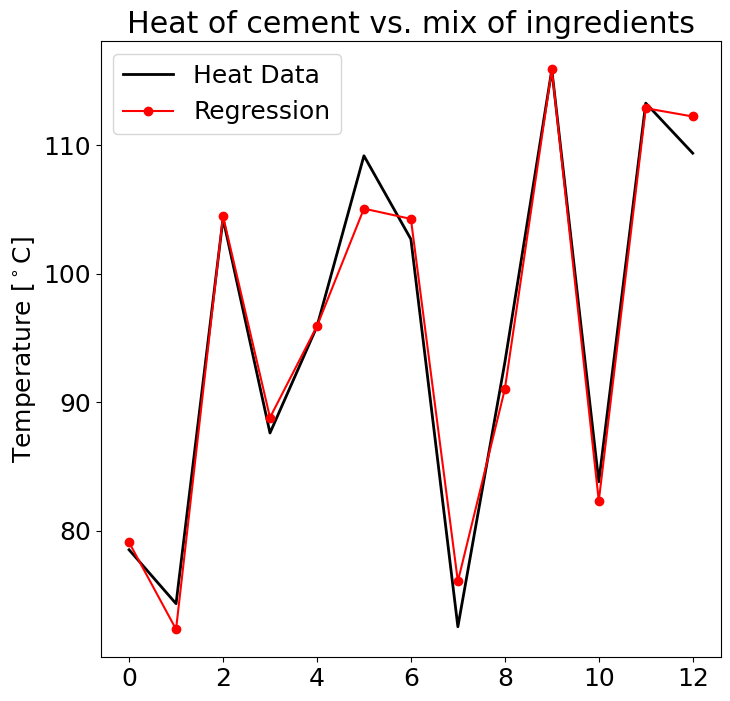

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
A = np.loadtxt('hald_ingredients.csv',delimiter=',')
print("Size of Matrix A: " + str(A.shape))
b = np.loadtxt('hald_heat.csv',delimiter=',')
print("Size of Matrix b: " + str(b.shape))

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# True relationship
plt.plot(b, color='k', linewidth=2, label='Heat Data') 

# Least Square Regression
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.ylabel('Temperature [$^\circ$C]')
plt.title("Heat of cement vs. mix of ingredients")
plt.legend()
plt.show()




In [13]:
# Alternative Methods:

# The first alternative is specific to Matlab:
# x = regress(b,A)

# Alternative 2:
x = np.linalg.pinv(A)@b
